In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Problems
## 3.1

We assume that borrowing $\$$980.39 today will grow to $\$$1000 at expiration, so the net cost of the index-plus-put position is: net cost = 1000 - 980.39 = 19.61.

By put-call parity the portfolio of
* long one index at 1000,
* long one 1000-strike put, and
* borrowing 980.39 (so you owe 1000 at maturity)

has the same payoff as a long call strike 1000. Its payoff at expiration is
$$
\text{Payoff}=\begin{cases} 0,\space S < 1000, \\ S - 1000,\space S\le 1000.
\end{cases}
$$

Subtracting the net cost of 19.61 gives the profit:


$$
\text{Profit}=\begin{cases} -19.61,\space S < 1000, \\
S-1000,\space S \ge 1000\end{cases}
$$

In [5]:
# Parmeters
S0 = 1000 # Price of the S&R index
K = 1000 # Strike of the put option
PVK = 980.39 # Amount borrwed
net_cost = S0 - PVK

In [6]:
# Define a range of possible S&R index values at expiration
S = np.linspace(800, 1200, 400)

In [12]:
payoff = np.where(S < K, 0, S - K)

In [10]:
profit = payoff - net_cost

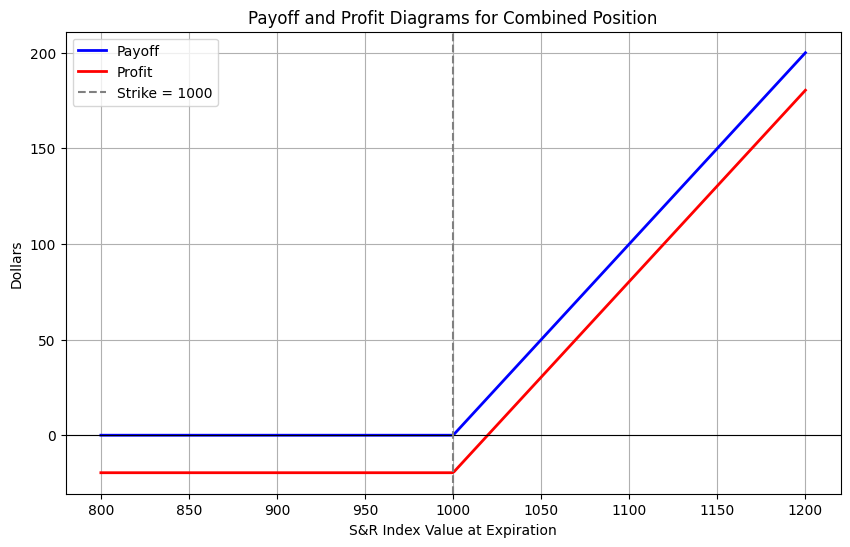

In [24]:
plt.figure(figsize=(10,6))
plt.plot(S, payoff, label='Payoff', color='blue', linewidth=2)
plt.plot(S, profit, label='Profit', color='red', linewidth=2)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(K, color='gray', linestyle='--', label='Strike = 1000')
plt.title('Payoff and Profit Diagrams for Combined Position')
plt.xlabel('S&R Index Value at Expiration')
plt.ylabel('Dollars')
plt.legend()
plt.grid(True)
plt.show()

## 3.2

Suppose that you short the S&R index for $\$$1000 and sell a 1000-strike put. Construct a table mimicking Table 3.1 that summarizes the payoff and profit position. Verify that your table matches Figure 3.5.

In [3]:
# --------------------------------------------------------
# PARAMETERS
# --------------------------------------------------------
S_min = 800 # minimum value of the index to consider
S_max = 1200 # maximum value of the index to consider
n_points = 401 # number of points in the grid 
strike = 1000 # strike price of the put
S0 = 1000 # initial price at which we short index.

In [6]:
# Option premium received. If not given, assume zero.
put_premium = 0.0

In [13]:
# --------------------------------------------------------
# PAYOFF FUNCTIONS
# --------------------------------------------------------
def short_index_payoff(S, short_price=S0):
    """
    Payoff from shorting the index at 'short_price'.
    At expiration, the payoff is (short_price - S).
    """
    return short_price - S

def short_put_payoff(S, K=strike):
    """
    Payoff from writing (selling) a put option with strike K.
    The payoff is -max(K - S, 0).
    Equivalently, short_put_payoff(S) = np.where(S < K, S - K, 0).
    """
    return np.where(S < K, S - K, 0)

In [9]:
# --------------------------------------------------------
# COMPUTE PAYOFF AND PROFIT
# --------------------------------------------------------
# Create a range of possible stock prices at expiration
S_values = np.linspace(S_min, S_max, n_points)

In [17]:
# Compute payoffs
payoff_short_index = short_index_payoff(S_values, short_price=S0)
payoff_short_put = short_put_payoff(S_values, K=strike)

In [20]:
# Total payoff from combining the short index and short put
payoff_total = payoff_short_index + payoff_short_put

In [22]:
# Profit = payoff + any initial premium received for the put (if given)
# if no premium is specified, profit = payoff_total
profit_total = payoff_total + put_premium

In [23]:
# --------------------------------------------------------
# PRINT A SMALL TABLE FOR DISCRETE VALUES
# --------------------------------------------------------
# For illustration, pick a few discrete underlying prices:
discrete_prices = [900, 950, 1000, 1050, 1100]

In [26]:
print("   S    | Short Index | Short Put | Total Payoff | Profit (if premium={:.2f})".format(put_premium))
print("--------+-------------+-----------+--------------+---------------------------------")
for s in discrete_prices:
    p_short_index = short_index_payoff(s, S0)
    p_short_put = short_put_payoff(np.array([s]), K=strike)[0]
    p_total = p_short_index + p_short_put
    p_profit = p_total + put_premium
    print(f"{s:6.0f} | {p_short_index:11.2f} | {p_short_put:9.2f} | {p_total:12.2f} | {p_profit:31.2f}")

   S    | Short Index | Short Put | Total Payoff | Profit (if premium=0.00)
--------+-------------+-----------+--------------+---------------------------------
   900 |      100.00 |   -100.00 |         0.00 |                            0.00
   950 |       50.00 |    -50.00 |         0.00 |                            0.00
  1000 |        0.00 |      0.00 |         0.00 |                            0.00
  1050 |      -50.00 |      0.00 |       -50.00 |                          -50.00
  1100 |     -100.00 |      0.00 |      -100.00 |                         -100.00


In [27]:
# --------------------------------------------------------
# PLOT THE PAYOFF AND PROFIT
# --------------------------------------------------------

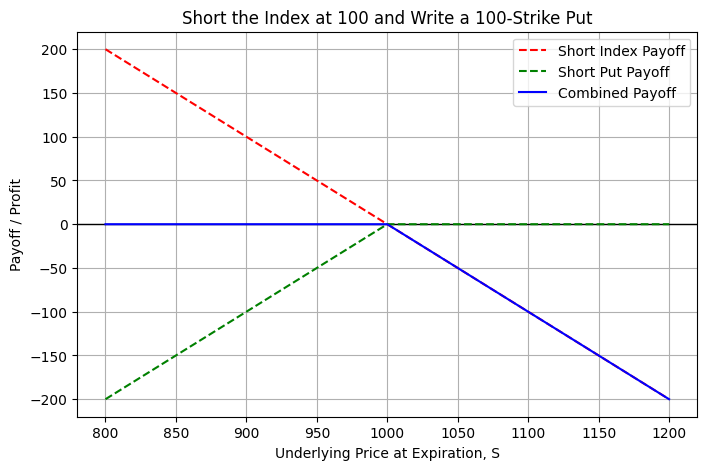

In [38]:
plt.figure(figsize=(8, 5))
plt.axhline(0, color='black', linewidth=1)

plt.plot(S_values, payoff_short_index, 'r--', label='Short Index Payoff')
plt.plot(S_values, payoff_short_put, 'g--', label="Short Put Payoff")
plt.plot(S_values, payoff_total, 'b', label="Combined Payoff")

# If you want to show profit separately (and there's a problem):
# it will just shift the total payoff by put_premium

if put_premium != 0:
    plt.plot(S_values, profit_total, 'm:', label='Combined Profit')

plt.title("Short the Index at 100 and Write a 100-Strike Put")
plt.xlabel("Underlying Price at Expiration, S")
plt.ylabel("Payoff / Profit")
plt.legend()
plt.grid(True)
plt.show()

1. Short Index Payoff = 1000 - $S$
2. Short Put Payoff:
       $$
           \begin{cases} S - 1000,\space S < 1000 \\ 0,\space S\ge1000 \end{cases}
       $$
3. Total Payoff = Short Index Payoff + Short Put payoff
4. Profit = Total payoff + (Put Premium received). If the premium is zero, payoff and profit coincide.

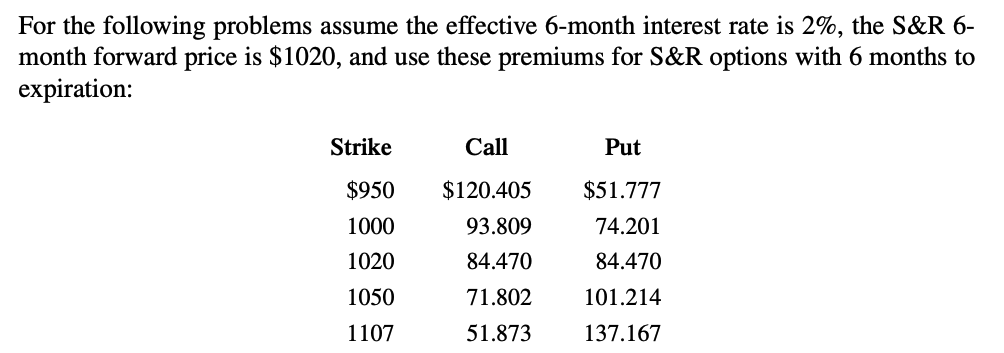

## 3.3
Suppose you buy the S&R index for 1000 and buy a 950_strike put. Construct payoff and profit diagram for this position. Verify that you obtain the same payoff and profit diagrab by investing 931.37 in zero-coupon bond and buying a 950-strike call.

In [39]:
# --------------------------------------------------------
# GIVEN DATA
# --------------------------------------------------------
r = 0.02 # 6-month effective interest rate (2%)
K_put = 950 # Put Strike
K_call = 950 # Call Strike (same as put for the parity check)
S0 = 1000 # Current price of the S&R index 
p_950 = 51.777 # premium for the 950-strike put
c_950 = 120.405 # Premium for the 950-strike call

In [40]:
# Amount invested in zero-coupon bond (so that it grows to 950 in 6 months)
bond_investment = 931.37

In [42]:
# --------------------------------------------------------
# COST OF EACH POSITION AT TIME 0
# --------------------------------------------------------
cost_protective_put = S0 + p_950
cost_bond_plus_call = bond_investment + c_950

In [46]:
# They should be (approximately) equal by put-call parity
print(f"Cost of buying index + put = {cost_protective_put:.3f}")
print(f"Cost of bond + call = {cost_bond_plus_call:.3f}")
print("These two should be nearly the same by put-call parity.")

Cost of buying index + put = 1051.777
Cost of bond + call = 1051.775
These two should be nearly the same by put-call parity.


In [47]:
# --------------------------------------------------------
# DEFINE A RANGE OF POSSIBLE S&R PRICES AT EXPIRATION
# --------------------------------------------------------
S_min, S_max = 800, 1100
n_points = 301
S = np.linspace(S_min, S_max, n_points)

In [49]:
# --------------------------------------------------------
# PAYOFFS AT EXPIRATION
# --------------------------------------------------------
# 1) PROTECTIVE PUT = S (the index) + Put Payoff = S + max(K - S, 0)
payoff_protective_put = np.maximum(S, K_put)

# 2) BOND + CALL = (bond matures to K) + Call Payoff = K + max(S - K, 0)
# which also simplifies to max(S, K)
payoff_bond_plus_call = np.maximum(S, K_call)

In [50]:
# --------------------------------------------------------
# PROFIT DIAGRAMS (IGNORE TIME VALUE OF MONEY)
# Typically, "profit" = final payoff - initial cost in today's dollars.
# --------------------------------------------------------
profit_protective_put = payoff_protective_put - cost_protective_put
profit_bond_plus_call = payoff_bond_plus_call - cost_bond_plus_call

In [51]:
# --------------------------------------------------------
# PRINT A SMALL TABLE FOR DISCRETE VALUES
# --------------------------------------------------------
sample_prices = [900, 950, 1000, 1050]
print("   S    | Protective Put Payoff | Bond+Call Payoff | Protective Put Profit | Bond+Call Profit")
print("--------+------------------------+-------------------+------------------------+------------------")
for s_val in sample_prices:
    pp_payoff = max(s_val, K_put)
    bc_payoff = max(s_val, K_call)
    pp_profit = pp_payoff - cost_protective_put
    bc_profit = bc_payoff - cost_bond_plus_call
    print(f"{s_val:6.0f} | {pp_payoff:22.2f} | {bc_payoff:17.2f} | {pp_profit:22.2f} | {bc_profit:16.2f}")
print()

   S    | Protective Put Payoff | Bond+Call Payoff | Protective Put Profit | Bond+Call Profit
--------+------------------------+-------------------+------------------------+------------------
   900 |                 950.00 |            950.00 |                -101.78 |          -101.78
   950 |                 950.00 |            950.00 |                -101.78 |          -101.78
  1000 |                1000.00 |           1000.00 |                 -51.78 |           -51.78
  1050 |                1050.00 |           1050.00 |                  -1.78 |            -1.78



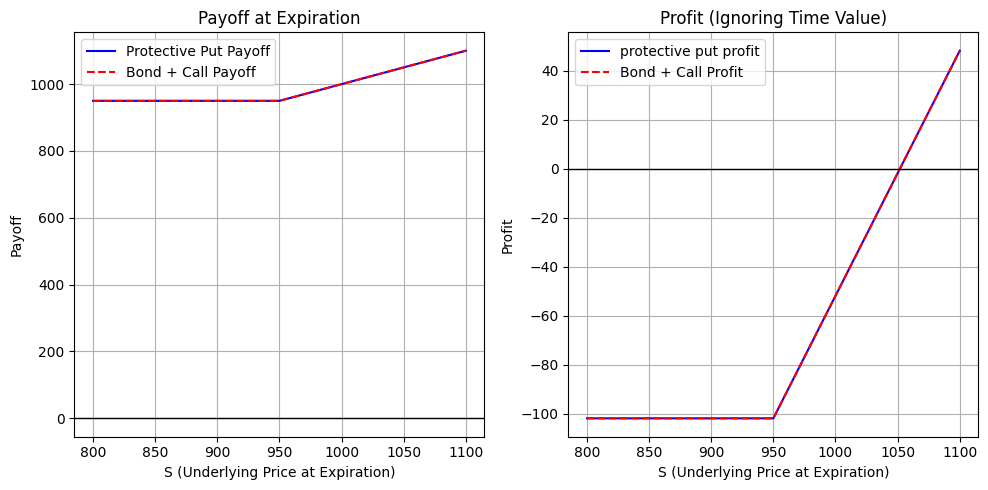

In [71]:
# --------------------------------------------------------
# PLOT PAYOFFS
# --------------------------------------------------------
plt.figure(figsize=(10, 5))

# Plot payoff
plt.subplot(1, 2, 1)
plt.plot(S, payoff_protective_put, 'b', label='Protective Put Payoff')
plt.plot(S, payoff_bond_plus_call, 'r--', label='Bond + Call Payoff')
plt.axhline(0, color='black', linewidth=1)
plt.title("Payoff at Expiration")
plt.xlabel("S (Underlying Price at Expiration)")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)


# Plot profit
plt.subplot(1, 2, 2)
plt.plot(S, profit_protective_put, 'b', label="protective put profit")
plt.plot(S, profit_bond_plus_call, 'r--', label="Bond + Call Profit")
plt.axhline(0, color='black', linewidth=1)
plt.title("Profit (Ignoring Time Value)")
plt.xlabel("S (Underlying Price at Expiration)")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Positions to compare
Protective Put: 
* Buying the index $S_0=1000$ and buy a put option with strike $K=950$.
* Bond + Call: Invest 931.37 in a zero-coupon bond (which will be worth 950 at expiration, given a 6-month interest rate of 2%) and buy a call strike with $K=950$.

#### Initial costs
* Protective Put Cost: 1000 + 51.777 = 1051.777
* Bond + Call cost: 931.37 + 120.405 $\approx$ 1051.775.
* They are almost indetical (small rounding differences)

#### Payoffs at Expiration
Protective Put: Payoff = S + max(950 - S, 0) = max(S, 950).

Bond + Call: Payoff = 950 + max(S - 950, 0) = max(S, 950)

Both positions yield exactly the same payoff, max(S,950)

This confirms the put call parity: $S_0$ + Put = PV(K) + Call.

## 3.4
Suppose you short the S&R index for 1000 and you buy a 950 strike call. Construct payoff and profit diagrams for this position. Verify that you obtain the same payoff and profit diagram by borrowing 931.37 and buying a 950-strike put

In [72]:
# GIVEN ASSUMPTIONS
r = 0.02 # 6-month effective interest rate (2%)
K = 950.0 # option strike 
S0 = 1000 # Current index level (shorted at 1000)
C950 = 120.405 # Premium for 950-strike call
P950 = 51.777 # Premium for 950-strike put 
borrowed = 931.37 # amount borrowed now, which grows to 950 in 6 months

In [73]:
# SET UP STOCK-PRICE GRID
S = np.linspace(0, 1500, 400) # possible index prices at expiration

In [74]:
# --------------------------------------------------------
#  1) SHORT INDEX at 1000 & LONG 950-CALL
# --------------------------------------------------------
#
# Payoff pieces at expiry T (ignoring the cost for now):
#   Short index @1000  => payoff  = -S   (the usual 'short stock payoff')
#   Long call(K=950)   => payoff  = max(S - 950, 0)
#
# So total payoff = -S + max(S-950,0).

In [75]:
payoff_short_call = -S + np.maximum(S - K, 0)

In [76]:
# Initial net cashflow today:
# +1000 from shorting the index 
# -120.405 to buy the call
init_cf_1 = S0 - C950 # = 1000 - 120.405 = 879.595

In [77]:
# Grow this initial net cashflow at 2% for 6 months
future_value_cf_1 = init_cf_1 * (1 + r)

In [78]:
# So the "profit" at expiry = payoff + future_value_of_initial_CF
profit_short_call = payoff_short_call + future_value_cf_1

In [79]:
# --------------------------------------------------------
#  2) BORROW 931.37 & LONG 950-PUT
# --------------------------------------------------------
#
# Payoff pieces at expiry:
#   Long 950-put => max(K - S, 0)
#   Borrow 931.37 => owe 931.37*(1+0.02) = 950 at expiry
#   So that piece of payoff is simply -950

In [80]:
# Total payoff = max(K - S, 0) - 950
payoff_borrow_put = np.maximum(K - S, 0) - 950.0

In [81]:
# Initial net cashflow today:
#   +931.37 from borrowing
#   -51.777 to buy the put
init_cf_2 = borrowed - P950   # ~ 879.593

In [83]:
# Future value of that initial net cashflow at 2% for 6 months 
future_value_cf_2 = init_cf_2 * (1 + r)

In [84]:
# Profit at expiry
profit_borrow_put = payoff_borrow_put + future_value_cf_2

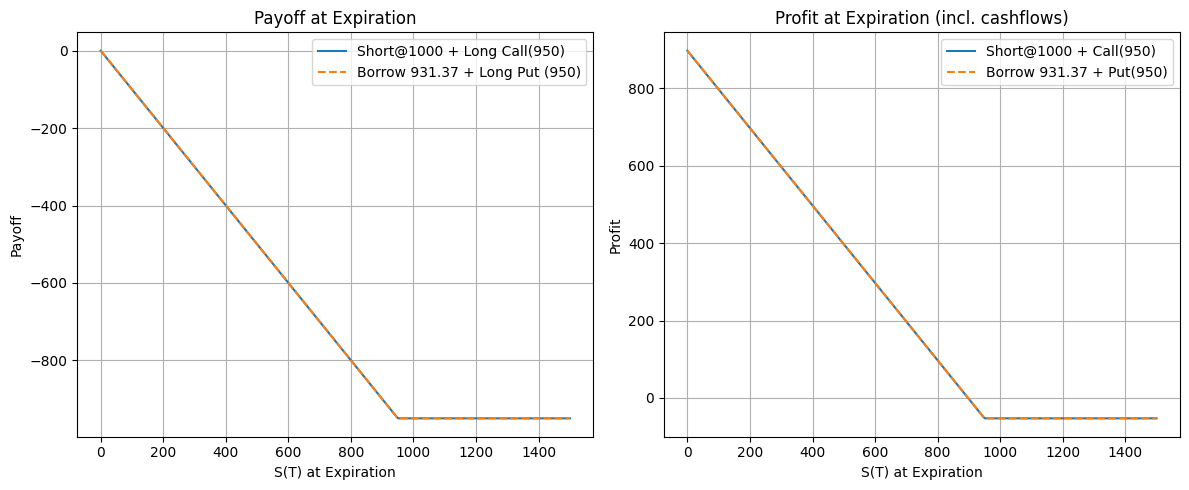

In [97]:
# -----------------------------
#  PLOT RESULTS
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Left plot: Payoffs
axs[0].plot(S, payoff_short_call, label='Short@1000 + Long Call(950)')
axs[0].plot(S, payoff_borrow_put, label='Borrow 931.37 + Long Put (950)', ls='--')
axs[0].set_title('Payoff at Expiration')
axs[0].set_xlabel('S(T) at Expiration')
axs[0].set_ylabel('Payoff')
axs[0].legend(loc='best')
axs[0].grid(True)

# Right Plot: Profits (include initial cashflows grown at 2%)
axs[1].plot(S, profit_short_call, label="Short@1000 + Call(950)")
axs[1].plot(S, profit_borrow_put, label='Borrow 931.37 + Put(950)', ls='--')
axs[1].set_title('Profit at Expiration (incl. cashflows)')
axs[1].set_xlabel('S(T) at Expiration')
axs[1].set_ylabel('Profit')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

The payoff at maturity from the short stock is - $S(T)$, and from the long call is $max[S(T)-950,0]$- Summing gives: Payoff$_1$ = $-S(T)$ + max($S(T)$-950,0).

The **initial** cashflow is +1000 from shorting the index minus the call premium 120.405. We invest that net amount at 2% for 6 monhts and add it to the terminal payoff to get the profit diagram.

Borrowing 931.37 now means you must repay 931.37 x 1.02 = 950 at maturity. Hence that part of the terminal payoff is -950.

The long 950-strike put gives max$[950-S(T),0]$. So the total payoff is Payoff$_2$=max(950-S(T),0)-950.

The initial cashflow is +931.37 (borrowed) minus the put premium 51.777. Again, invest that amount at 2% and add to the terminal payoff to get the profit.

$$
\text{Payoff}_1 = \begin{cases}
-S,\space S < 950 \\
-950,\space S \ge 950
\end{cases}
$$

$$
\text{Payoff}_2=\begin{cases}
-S,\space S < 950, \\
-950,\space S \ge 950,
\end{cases}
$$

## 3.5

Suppose you short the S&R index for 1000 and buy a 1050-strike call. Construct payoff and profit diagrams for this position. Verify that you obtain the same payoff and profit diagram for this position. Verify that you obtain the same payoff and profit diagram by borrowing 1029.41 and buying a 1050-strike put.

In [98]:
r = 0.02 # 6-month effective interest rate (2%)
K = 1050.0 # option strike 
S0 = 1000.0 # current index level (shorted at 1000)
C1050 = 71.802 # Premium for 1050-strike call 
P1050 = 101.214 # Premium for 1050-strike put 
borrowed = 1029.41 # amount borrowed now (which grows to 1050 in 6 months)

In [103]:
# -----------------------------
#  SET UP STOCK-PRICE GRID
# -----------------------------
S = np.linspace(0, 1500, 400) # possible index prices at expiration.

In [104]:
# --------------------------------------------------------
# 1) SHORT INDEX @1000 & LONG 1050-CALL
# --------------------------------------------------------
#
# Terminal payoff at expiry T, ignoring initial costs:
#      Short index => -S(T)
#.     Long call(K=1050) => max(S(T) - 1050, 0)
#
# so total payoff = -S(T) + max(S(T) - 1050, 0).
payoff_pos1 = -S + np.maximum(S - K, 0)

In [105]:
# Initial net cashflow today:
#   +1000 from shorting the index
#   -71.802 to buy the call
init_cf_1 = S0 - C1050 # 1000 - 71.802 = 928.198

In [106]:
# Future value of that initial cashflow at 2% for 6 months
future_value_cf_1 = init_cf_1 * (1 + r)

In [107]:
# "Profit" at expiry = payoff + future_value_of_initial_cashflow
profit_pos1 = payoff_pos1 + future_value_cf_1

In [108]:
# --------------------------------------------------------
# 2) BORROW 1029.41 & LONG 1050-PUT
# --------------------------------------------------------
#
# Terminal payoff at expiry:
#   Long put(K=1050) => max(1050 - S(T), 0)
#   Borrow 1029.41 => owe 1050 at expiry
#
# So total payoff = max(1050 - S(T), 0) - 1050.

payoff_pos2 = np.maximum(K - S, 0) - K

In [111]:
# Initial net cashflow today:
#   +1029.41 (borrowed)
#   -101.214 (cost of the 1050-put)
init_cf_2 = borrowed - P1050  # 1029.41 - 101.214 = 928.196 (approx)

In [112]:
# Future value at 2% for 6 months
future_value_cf_2 = init_cf_2 * (1 + r)

In [113]:
# Profit at expiry
profit_pos2 = payoff_pos2 + future_value_cf_2

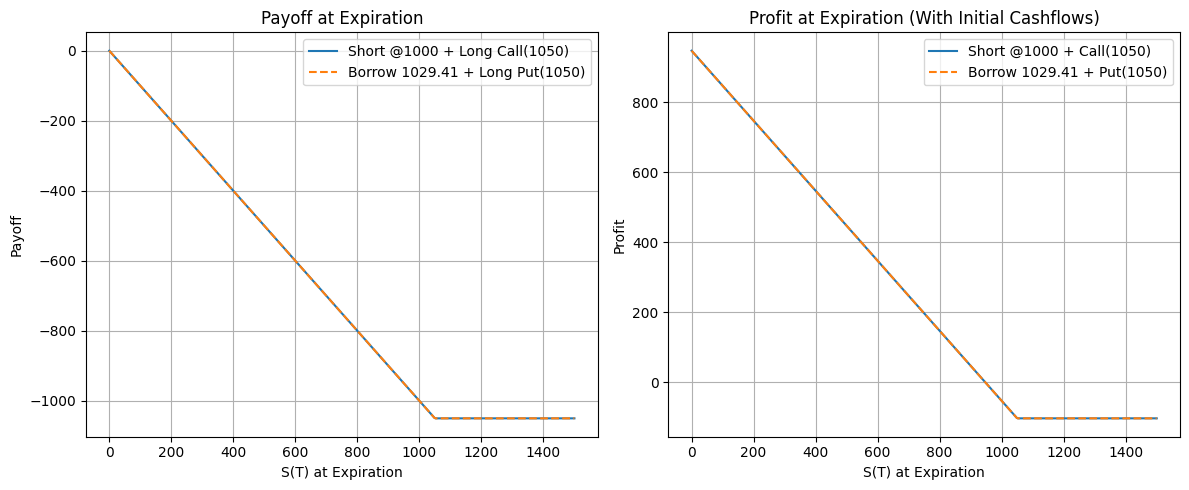

In [117]:
# -----------------------------
#  PLOT RESULTS
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# --- LEFT PLOT: Payoff (ignore initial cost) ---
axs[0].plot(S, payoff_pos1, label="Short @1000 + Long Call(1050)")
axs[0].plot(S, payoff_pos2, '--', label="Borrow 1029.41 + Long Put(1050)")
axs[0].set_title("Payoff at Expiration")
axs[0].set_xlabel("S(T) at Expiration")
axs[0].set_ylabel("Payoff")
axs[0].legend(loc="best")
axs[0].grid(True)

# --- RIGHT PLOT: Profit (include initial cash flows) ---
axs[1].plot(S, profit_pos1, label="Short @1000 + Call(1050)")
axs[1].plot(S, profit_pos2, "--", label="Borrow 1029.41 + Put(1050)")
axs[1].set_title("Profit at Expiration (With Initial Cashflows)")
axs[1].set_xlabel("S(T) at Expiration")
axs[1].set_ylabel("Profit")
axs[1].legend(loc="best")
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 3.6
Verify that you earn the same profit and payoff by (a) buying the S&R index for 1000 and (b) buying a 950 strike S&R call, selling a 950-strike S&R put, and lending 931.37

In [143]:
r = 0.02             # 6-month effective interest rate
S0 = 1000.0          # current index price
K  = 950.0           # strike
C950 = 120.405       # premium for 950-strike call
P950 =  51.777       # premium for 950-strike put
lend = 931.37        # cost of lending now to receive 950 in 6 months

In [123]:
# Check initial costs
init_cost_A = 1000.0
future_value_A = initial_cost_A * (1+r) # what you effectively lose at expiry.

In [132]:
# Position B: Buy 950-call, sell 950-put, and lend 931.37
# net cost options = call - put = 120.405 - 51.777 = 68.628.
# Lend cost 931.37 now => payoff of 950 at expiry
# Total initial cost = 68.628 + 931.37 ~= 1000
init_cost_B = (C950 - P950) + lend
future_value_B = init_cost_B * (1 + r)

print(f"Position A initial cost = {init_cost_A:.3f}")
print(f"Position B initial cost = {init_cost_B:.3f} (they match to within rounding)")

Position A initial cost = 1000.000
Position B initial cost = 999.998 (they match to within rounding)


In [133]:
# -----------------------------
#  PAYOFFS AT EXPIRATION
# -----------------------------
S = np.linspace(0,1500,400)    # possible index prices at expiry

# Position A payoff: holding the index => payoff = S(T)
payoff_A = S

In [127]:
# Position B payoff, piece by piece
#   Long call(950): max[S - 950, 0]
#   Short put(950): -max[950 - S, 0] = min[S - 950, 0]
#   Sum of those two is (S - 950) for ALL S, since one or the other is zero
#   Lend 931.37 => +950 at expiry
#   Total payoff = (S - 950) + 950 = S

In [128]:
call_payoff = np.maximum(S - K,0)
put_payoff = -np.maximum(K - S, 0)
bond_payoff = K * np.ones_like(S) # since 931.37 grows to 950
payoff_B = (call_payoff + put_payoff) + bond_payoff

In [134]:
# -----------------------------
#  PROFITS AT EXPIRATION
# -----------------------------
#
# Usually we define "profit" as final payoff MINUS the future value of the initial cost.
# That is, profit = payoff - (initial_cost * (1+r)).
#
profit_A = payoff_A - future_value_A
profit_B = payoff_B - future_value_B

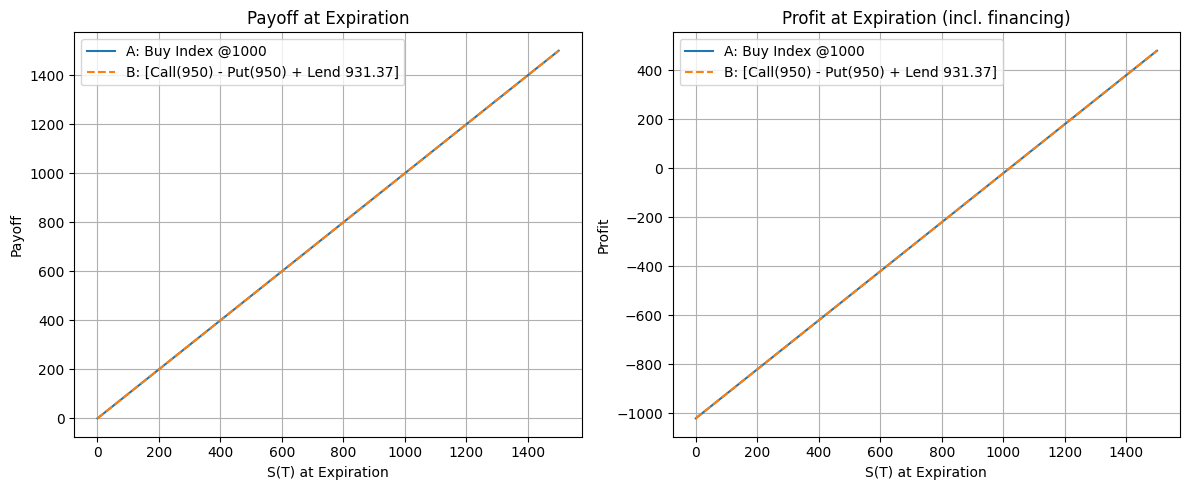

In [142]:
# -----------------------------
#  PLOT RESULTS
# -----------------------------
fig, axs = plt.subplots(1,2, figsize=(12,5))

# PAYOFFS
axs[0].plot(S, payoff_A, label='A: Buy Index @1000')
axs[0].plot(S, payoff_B, '--', label='B: [Call(950) - Put(950) + Lend 931.37]')
axs[0].set_title('Payoff at Expiration')
axs[0].set_xlabel('S(T) at Expiration')
axs[0].set_ylabel('Payoff')
axs[0].legend(loc='best')
axs[0].grid(True)

# PROFITS
axs[1].plot(S, profit_A, label='A: Buy Index @1000')
axs[1].plot(S, profit_B, '--', label='B: [Call(950) - Put(950) + Lend 931.37]')
axs[1].set_title('Profit at Expiration (incl. financing)')
axs[1].set_xlabel('S(T) at Expiration')
axs[1].set_ylabel('Profit')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

You pay 1000 at time 0 and simply receive $S(T)$ at expiry, so payoff is $S(T)$.

The profit is $S(T)-1000\times(1+r)$, accounting for the financing cost of your initial 1000.

Buying the call + selling the put at the same strike $K = 950$ produces a net option payoff of $S(T)-950$.

Lending 931.37 grows to 950 at expiry, giving ($S(T) - 950$) + 950 = $S(T)$

The initial net cost is 120.405 - 51.777 + 931.37 $\approx$ 1000. Grown at 2% that gain becomes 1020 at expiry.

Hence its profits is also $S(T) - 1000 \times (1+r)$.

Because both positions share the same payoff and the same cost, they must also share the same profit diagram.

## 3.7
Verify that you earn the same profit and payoff by (a) shorting the S&R index for 1000 and (b) selling a 1050-strike S&R call, buying a 1050-strike put, and borrowing 1029.41

In [144]:
r = 0.02               # 6-month effective interest rate
S0 = 1000.0            # price at which we short the index
K  = 1050.0            # option strike
call_1050 = 71.802     # premium for 1050-strike call
put_1050  = 101.214    # premium for 1050-strike put
borrow    = 1029.41    # borrowed amount, which grows to 1050 in 6 months

In [145]:
# -----------------------------
#  POSITION (A): SHORT INDEX
# -----------------------------
# Payoff at expiry from short index: -S(T)
# Initial cashflow: +1000
init_cf_A = S0
fv_init_cf_A = init_cf_A * (1 + r)  # future value of initial proceeds

In [146]:
# -----------------------------
#  POSITION (B): SELL CALL, BUY PUT, BORROW
# -----------------------------
#
#  1) Sell 1050-call => collect +call_1050 now; payoff = -max[S(T)-1050,0]
#  2) Buy 1050-put   => pay -put_1050 now;    payoff = +max[1050-S(T),0]
#     Summation of those two option payoffs is always (1050 - S(T)).
#  3) Borrow 1029.41 => owe 1050 at expiry => payoff from that borrowing = -1050
#  So total payoff at expiry = (1050 - S(T)) - 1050 = -S(T),
#  exactly matching the short‐index payoff.
#
# Initial net cashflow = +call_1050 - put_1050 + borrow
init_cf_B = call_1050 - put_1050 + borrow
fv_init_cf_B = init_cf_B * (1 + r)

In [147]:
# -----------------------------
#  BUILD PAYOFF/PROFIT ARRAYS
# -----------------------------
S = np.linspace(0, 1500, 400)  # range of possible index prices at expiry

In [148]:
# Position (A) payoff and profit
payoff_A = -S
profit_A = payoff_A + fv_init_cf_A

In [149]:
# Position (B) payoff and profit
#  short call payoff = -max(S-K, 0), long put payoff = max(K-S, 0),
#  plus the borrowed portion => owe K = 1050
#  sum payoff = ( -max(S-K,0) + max(K-S,0) ) - K
#             = 1050 - S - 1050 = -S
payoff_B = -S
profit_B = payoff_B + fv_init_cf_B

In [150]:
profit_A, profit_B

(array([1020.        , 1016.2406015 , 1012.48120301, 1008.72180451,
        1004.96240602, 1001.20300752,  997.44360902,  993.68421053,
         989.92481203,  986.16541353,  982.40601504,  978.64661654,
         974.88721805,  971.12781955,  967.36842105,  963.60902256,
         959.84962406,  956.09022556,  952.33082707,  948.57142857,
         944.81203008,  941.05263158,  937.29323308,  933.53383459,
         929.77443609,  926.01503759,  922.2556391 ,  918.4962406 ,
         914.73684211,  910.97744361,  907.21804511,  903.45864662,
         899.69924812,  895.93984962,  892.18045113,  888.42105263,
         884.66165414,  880.90225564,  877.14285714,  873.38345865,
         869.62406015,  865.86466165,  862.10526316,  858.34586466,
         854.58646617,  850.82706767,  847.06766917,  843.30827068,
         839.54887218,  835.78947368,  832.03007519,  828.27067669,
         824.5112782 ,  820.7518797 ,  816.9924812 ,  813.23308271,
         809.47368421,  805.71428571,  801.95488

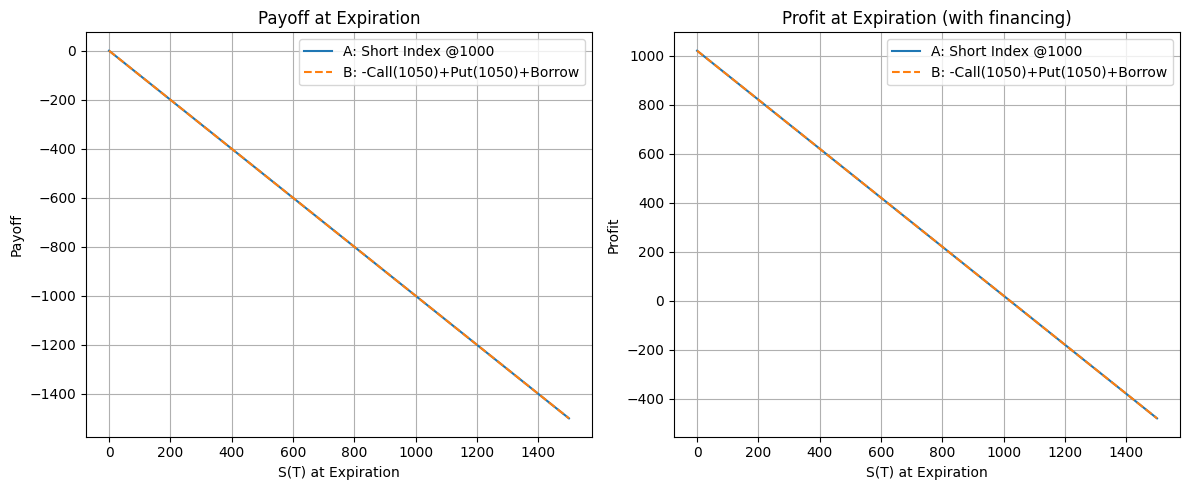

In [153]:
# -----------------------------
#  PLOT
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# --- Payoffs (ignoring initial cash flow)
axs[0].plot(S, payoff_A, label='A: Short Index @1000')
axs[0].plot(S, payoff_B, '--', label='B: -Call(1050)+Put(1050)+Borrow')
axs[0].set_title('Payoff at Expiration')
axs[0].set_xlabel('S(T) at Expiration')
axs[0].set_ylabel('Payoff')
axs[0].legend(loc='best')
axs[0].grid(True)

# --- Profits (including initial cash flows grown at r) ---
axs[1].plot(S, profit_A, label='A: Short Index @1000')
axs[1].plot(S, profit_B, '--', label='B: -Call(1050)+Put(1050)+Borrow')
axs[1].set_title("Profit at Expiration (with financing)")
axs[1].set_xlabel('S(T) at Expiration')
axs[1].set_ylabel('Profit')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 3.7
Verify that you earn the same profit and payoff by (a) shorting the S&R index for 1000 and (b) selling a 1050-strike S&R call, buying a 1050-strike put, and borrowing 1029.41.

In [154]:
r = 0.02               # 6-month effective interest rate (2%)
S0 = 1000.0            # current index price at which we short the index
K  = 1050.0            # strike for call and put
call_1050 = 71.802     # premium received from selling the 1050-call
put_1050  = 101.214    # premium paid for buying the 1050-put
borrow    = 1029.41    # amount borrowed now, which grows to 1050 in 6 months

In [155]:
# -----------------------------
#  POSITION A: SHORT THE INDEX @1000
# -----------------------------
#   Payoff at expiry:  -S(T)
#   Initial CF:        +1000 (the proceeds from shorting)
#   That 1000 grows at 2% for 6 months -> 1000 * 1.02 at expiry
#
init_cf_A   = S0
fv_init_cf_A = init_cf_A * (1 + r)  # future value at expiry

In [156]:
# For a range of possible stock prices at expiry:
S = np.linspace(0, 1500, 400)       # S(T)

payoff_A = -S
profit_A = payoff_A + fv_init_cf_A

In [157]:
# -----------------------------
#  POSITION B:
#    - Sell a 1050-call
#    - Buy a 1050-put
#    - Borrow 1029.41
# -----------------------------
#
#   At expiry:
#    - Short call payoff = -max[S-K, 0]
#    - Long put payoff   =  max[K-S, 0]
#    - Net option payoff = ( -max[S-K,0] + max[K-S,0] ) = (K - S) for all S
#    - Borrow 1029.41 -> owe 1050 at expiry, so payoff = -1050
#    => total payoff = (K - S) - K = -S
#
#   Initial CF:
#     + call premium (71.802)
#     - put premium  (101.214)
#     + borrowed     (1029.41)
#     = 71.802 - 101.214 + 1029.41 ≈ 1000
#
init_cf_B = (call_1050) - (put_1050) + borrow
fv_init_cf_B = init_cf_B * (1 + r)

In [158]:
payoff_B = -S  # exactly the same as payoff_A
profit_B = payoff_B + fv_init_cf_B

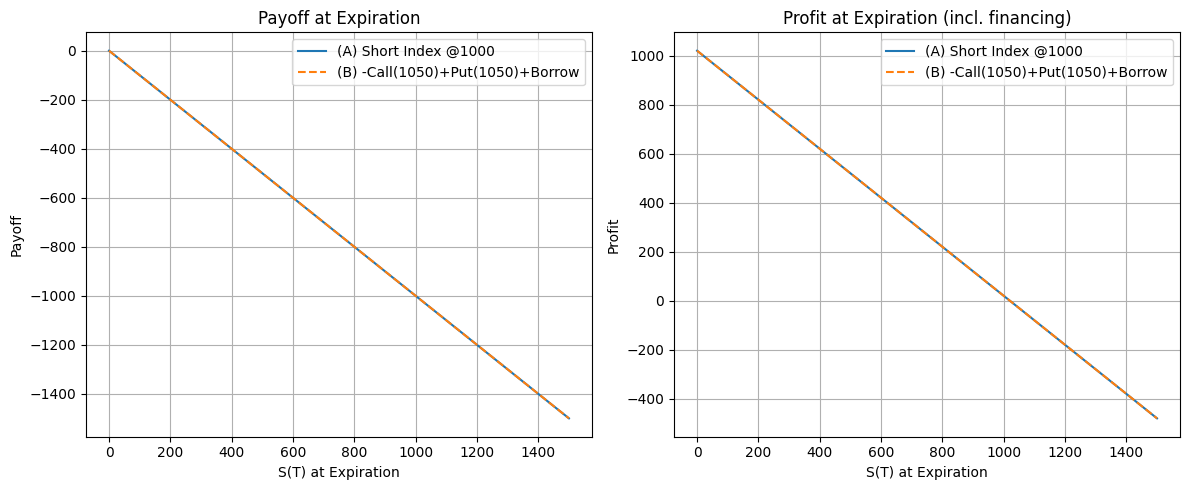

In [159]:
# -----------------------------
#  PLOT
# -----------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# ---- LEFT: Payoff diagrams (ignore initial cash flow) ----
axs[0].plot(S, payoff_A, label='(A) Short Index @1000')
axs[0].plot(S, payoff_B, '--', label='(B) -Call(1050)+Put(1050)+Borrow')
axs[0].set_title('Payoff at Expiration')
axs[0].set_xlabel('S(T) at Expiration')
axs[0].set_ylabel('Payoff')
axs[0].legend(loc='best')
axs[0].grid(True)

# ---- RIGHT: Profit diagrams (include initial CF grown at 2%) ----
axs[1].plot(S, profit_A, label='(A) Short Index @1000')
axs[1].plot(S, profit_B, '--', label='(B) -Call(1050)+Put(1050)+Borrow')
axs[1].set_title('Profit at Expiration (incl. financing)')
axs[1].set_xlabel('S(T) at Expiration')
axs[1].set_ylabel('Profit')
axs[1].legend(loc='best')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## 3.8
Suppose the premium on a 6-month S&R Call is 109.20 and the premium on a put with the same strike price is 60.18. What is the strike price?

In [161]:
C = 109.20 # call premium
P = 60.18 # put premium
F = 1020.0 # 6-month forward price of the underlying
r_eff = 0.02 # 6-month effective interest rate (2%)

In [162]:
# Put–call parity in a forward‐pricing context (no dividends) says:
#    C - P = (F - K) / (1 + r_eff)
# Rearrange to solve for K:
#    K = F - (C - P) * (1 + r_eff)

In [163]:
diff = C - P # 109.20 - 60.18 = 49.02
F_minusK = diff * (1 + r_eff) # = 49.02 * 1.02 ≈ 50.00
K = F - F_minusK # = 1020 - 50.00 = 970 (approximately)
print("The strike price K is approximately:", round(K, 2))

The strike price K is approximately: 970.0


Under standard (European) put-call parity for an aset with forward price $F$ and effective risk-free rate $r_{eff}$ over the option's life (assume 6 months here), we have

$$
\text{Call Premium} - \text{Put Premium} = \frac{F - K}{1+r_{eff}}
$$

Solving for the strike K gives 

$$
K = F - (C - P)(1 + r_{eff})
$$

* $C-P = 109.20 - 60.18 = 49.02$
* Multiply by 1 + 0.02 = 1.02 to get $49.02\times1.02\approx50.00$
* Hence $K\approx1020 - 50 = 970$

Therefore, the strike price that matches those call and put premia at a 2% 6-month effective rate and 6-month forward $F=1020$ is about $\$$970.

## 3.9
Construct payoff and profit diagrams for the purchase of a 950-strike S&R call and sale of 1000-strike S&R call. Verify that you obtain exactly the same profit diagram for the purchase of a 950-strike S&R put and sale of a 1000-strike S&R put. What is the difference in the payoff diagrams for the call and put spreads? Why is there a difference?

In [166]:
# Given data 
r = 0.02 # 6-month effective interest rate (2%)
T = 0.5 # 6 month in years 
K1 = 950 # Lower strike 
K2 = 1000 # Higher Strike 

In [167]:
# Option premiums (all per share)
call_950 = 120.405
call_1000 = 93.809
put_950 = 51.777
put_1000 = 74.201

In [168]:
# For clarity, we assume we pay the net option cost at time 0 (ignore discounting in diagrams)
net_cost_call_spread = call_950 - call_1000
net_cost_put_spread = put_950 - put_1000

In [170]:
# Range of possible underlying prices at expiry
S = np.linspace(800, 1200, 401)
S

array([ 800.,  801.,  802.,  803.,  804.,  805.,  806.,  807.,  808.,
        809.,  810.,  811.,  812.,  813.,  814.,  815.,  816.,  817.,
        818.,  819.,  820.,  821.,  822.,  823.,  824.,  825.,  826.,
        827.,  828.,  829.,  830.,  831.,  832.,  833.,  834.,  835.,
        836.,  837.,  838.,  839.,  840.,  841.,  842.,  843.,  844.,
        845.,  846.,  847.,  848.,  849.,  850.,  851.,  852.,  853.,
        854.,  855.,  856.,  857.,  858.,  859.,  860.,  861.,  862.,
        863.,  864.,  865.,  866.,  867.,  868.,  869.,  870.,  871.,
        872.,  873.,  874.,  875.,  876.,  877.,  878.,  879.,  880.,
        881.,  882.,  883.,  884.,  885.,  886.,  887.,  888.,  889.,
        890.,  891.,  892.,  893.,  894.,  895.,  896.,  897.,  898.,
        899.,  900.,  901.,  902.,  903.,  904.,  905.,  906.,  907.,
        908.,  909.,  910.,  911.,  912.,  913.,  914.,  915.,  916.,
        917.,  918.,  919.,  920.,  921.,  922.,  923.,  924.,  925.,
        926.,  927.,

In [171]:
# ---- Payoffs at maturity (ignore premiums for now) ----

In [176]:
# Call spread payoff = max(S - K1, 0) - max(S2 - K2, 0)
payoff_call_spread = np.maximum(S - K1, 0) - np.maximum(S - K2, 0)

In [178]:
# Put spread payoff = max(K1 - S, 0) - max(K2 - S, 0)
payoff_put_spread  = np.maximum(K1 - S, 0) - np.maximum(K2 - S, 0)

In [179]:
# ---- Profits at maturity = payoff - net cost ----
profit_call_spread = payoff_call_spread - net_cost_call_spread
profit_put_spread  = payoff_put_spread  - net_cost_put_spread

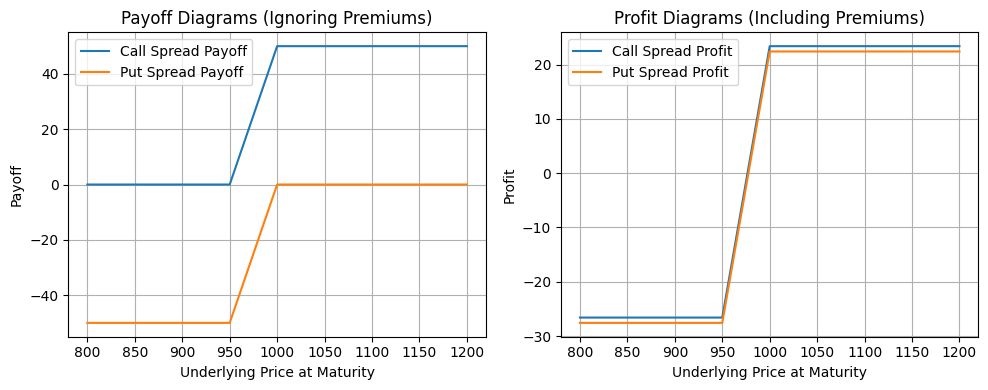

In [185]:
# ---- Plotting ----
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)
# Payoff diagrams
axes[0].plot(S, payoff_call_spread, label='Call Spread Payoff')
axes[0].plot(S, payoff_put_spread,  label='Put Spread Payoff')
axes[0].set_title('Payoff Diagrams (Ignoring Premiums)')
axes[0].set_xlabel('Underlying Price at Maturity')
axes[0].set_ylabel('Payoff')
axes[0].legend(loc='best')
axes[0].grid(True)

# Profit diagrams
axes[1].plot(S, profit_call_spread, label='Call Spread Profit')
axes[1].plot(S, profit_put_spread,  label='Put Spread Profit')
axes[1].set_title('Profit Diagrams (Including Premiums)')
axes[1].set_xlabel('Underlying Price at Maturity')
axes[1].set_ylabel('Profit')
axes[1].legend(loc='best')
axes[1].grid(True)
plt.tight_layout()
plt.show()

* Payoffs at maturity differ because a call pays off if the underlying ends above the strike, whereas a put pays off if the underlying ends below the strike. Consequently, the shape of the call-spread payoff (nonzero for high prices) differs from that of the put-spread payoff (nonzero for low prices).
* However, once you subtract the net premiums (the initial cost or credit), both spreads end having the same overall profit curve. This is guaranteed by put-call parity, which links call and put prices for the same strikes and expiration when the forward price (here $\$$1020 in 6 months) and interest rate (2%) are accounted for.

## 3.10

Construct payoff and profit diagrams for the purchase of a 1050-strike S&R call and sale of a 950-strike S&R call. Verify that you obtain exactly the same profit diagram for the purchase of a 1050-strike S&R put and sale of a 950-strike S&R put. What is the difference in the initial cost of these positions.

In [186]:
# -------------------------
# Problem parameters
# -------------------------
r       = 0.02      # 6-month effective interest rate (2%)
T       = 0.5       # 6 months
K_low   = 950
K_high  = 1050

In [187]:
# Option premiums (per share):
call_950  = 120.405
call_1050 = 71.802
put_950   = 51.777
put_1050  = 101.214

In [188]:
# -------------------------
# Strategy:
#   1) Call Spread: +Call(K=1050) -Call(K=950)
#   2) Put  Spread: +Put(K=1050)  -Put(K=950)
# -------------------------
net_cost_call_spread = (call_1050 - call_950)
net_cost_put_spread  = (put_1050  - put_950)

In [189]:
print("Net cost of call spread:", net_cost_call_spread)
print("Net cost of put spread:",  net_cost_put_spread)
print("Difference in initial cost (put - call):",
      net_cost_put_spread - net_cost_call_spread)

Net cost of call spread: -48.602999999999994
Net cost of put spread: 49.437
Difference in initial cost (put - call): 98.03999999999999


In [190]:
# -------------------------
# Define a range of possible underlying prices at maturity
# -------------------------
S = np.linspace(800, 1200, 401)

In [195]:
# -------------------------
# Payoffs (ignoring premiums)
# -------------------------
payoff_call_spread = np.maximum(S - K_high, 0) - np.maximum(S - K_low, 0)
payoff_put_spread  = np.maximum(K_high - S, 0) - np.maximum(K_low - S, 0)

In [196]:
# -------------------------
# Profits (payoff minus net cost)
# -------------------------
profit_call_spread = payoff_call_spread - net_cost_call_spread
profit_put_spread  = payoff_put_spread  - net_cost_put_spread

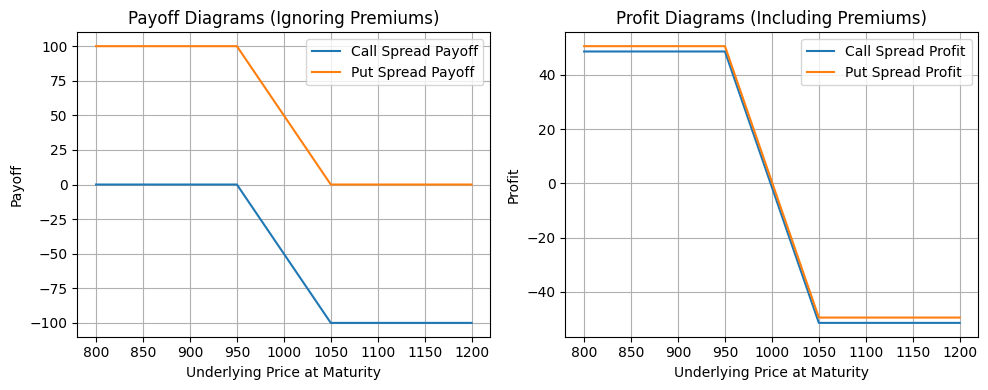

In [200]:
# -------------------------
# Plot: Payoff (left) and Profit (right)
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)

# (1) Payoff diagrams
axes[0].plot(S, payoff_call_spread, label='Call Spread Payoff')
axes[0].plot(S, payoff_put_spread,  label='Put Spread Payoff')
axes[0].set_title('Payoff Diagrams (Ignoring Premiums)')
axes[0].set_xlabel('Underlying Price at Maturity')
axes[0].set_ylabel('Payoff')
axes[0].legend(loc='best')
axes[0].grid(True)

# (2) Profit diagrams
axes[1].plot(S, profit_call_spread, label='Call Spread Profit')
axes[1].plot(S, profit_put_spread,  label='Put Spread Profit')
axes[1].set_title('Profit Diagrams (Including Premiums)')
axes[1].set_xlabel('Underlying Price at Maturity')
axes[1].set_ylabel('Profit')
axes[1].legend(loc='best')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 3.11
Suppose you invest in the S&R index for 1000, buy a 950-strike put, and a sell 1050-strike call. Draw a profit program for this position. What is the net option premium? If you wanted to construct a zero-cost collar keeping the put strike equal to 950, in what direction would have to change the call strike?

In [201]:
# -------------------------
# Given data
# -------------------------
S0 = 1000        # current index level
K_put  = 950
K_call = 1050

In [202]:
premium_put  = 51.777   # cost of buying the 950 put
premium_call = 71.802   # proceeds from selling the 1050 call

In [203]:
# Net option premium (buy put, sell call)
net_premium = premium_put - premium_call
print("Net option premium:", net_premium)   # ~ -20.025 (you receive about $20)

Net option premium: -20.025000000000006


In [204]:
# -------------------------
# Profit at expiry:
#   Underlying payoff  = S - 1000
#   Long put payoff    = max(K_put - S, 0)
#   Short call payoff  = - max(S - K_call, 0)
#   Total profit       = (S - 1000) + max(K_put - S, 0) - max(S - K_call, 0) + net_premium
# -------------------------

In [205]:
# Underlying prices from 800 to 1200
S = np.linspace(800, 1200, 401)

In [206]:
# Payoff from underlying (minus initial cost)
payoff_underlying = S - S0

In [207]:
# Payoff from the long put
payoff_put = np.maximum(K_put - S, 0)

In [208]:
# Payoff from the short call
payoff_call = - np.maximum(S - K_call, 0)

In [211]:
# Total profit
profit = payoff_underlying + payoff_put + payoff_call + net_premium

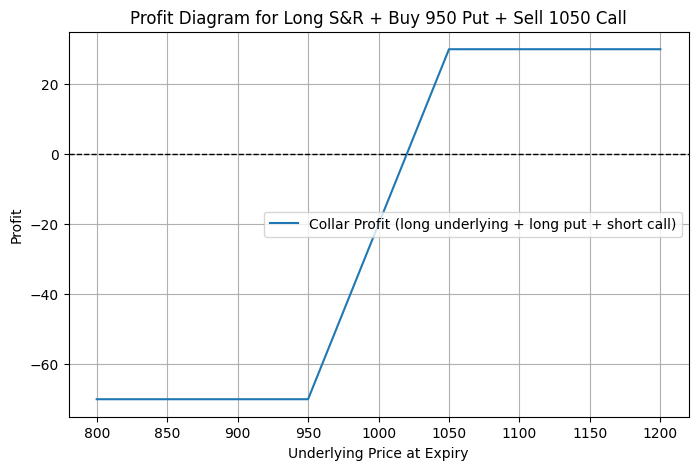

In [216]:
# -------------------------
# Plot
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(S, profit, label='Collar Profit (long underlying + long put + short call)')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Profit Diagram for Long S&R + Buy 950 Put + Sell 1050 Call')
plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Profit')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [217]:
print("To form a *zero-cost* collar with the put strike still at $950,",
      "you would need to *raise* the call strike so its premium decreases",
      "and exactly offsets the put premium.")

To form a *zero-cost* collar with the put strike still at $950, you would need to *raise* the call strike so its premium decreases and exactly offsets the put premium.


## 3.11
Suppose you invest in the S&R index for 1000, buy a 950-strike put, and sell a 1050-strike call. Draw a profit diagram for this position. What is the net option premium? If you wanted to construct a zero-cost collar keeping the put strike equal to 950, in what direction would you have to change the call strike?

In [218]:
S0 = 1000
K_put = 950
K_call = 1050

premium_put = 51.777 # Cost of buying the 950 put
premium_call = 71.802 # Proceeds from selling the 1050 call

In [219]:
# Net option premium = cost(put) - proceeds(call).
# A negative number indicates a net credit.
net_premium = premium_put - premium_call
print(f"Net option premium: {net_premium:.3f} USD")

Net option premium: -20.025 USD


In [221]:
# -------------------------
# Profit at Maturity
#   1) Underlying:    S - 1000
#   2) Long Put:      max(950 - S, 0)
#   3) Short Call:   -max(S - 1050, 0)
#   4) Net Premium:   net_premium
# -------------------------

def collar_profit(S):
    payoff_underlying = S - S0
    payoff_put = np.maximum(K_put - S, 0)
    payoff_call = -np.maximum(S - K_call, 0)
    return payoff_underlying + payoff_put + payoff_call + net_premium

In [223]:
# Range of possible terminal prices
S_values = np.linspace(800, 1200, 401)

In [224]:
# Compute profits across the range
profits = collar_profit(S_values)

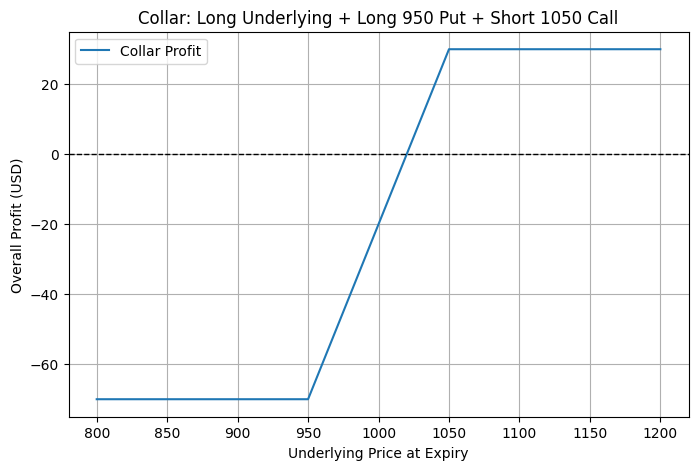

In [225]:
# -------------------------
# Plot the profit
# -------------------------
plt.figure(figsize=(8,5))
plt.plot(S_values, profits, label='Collar Profit')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Collar: Long Underlying + Long 950 Put + Short 1050 Call')
plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Overall Profit (USD)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [226]:
# -------------------------
# Zero-cost collar question
# -------------------------
print("Since the 950-put costs less than the 1050-call premium, you get a net credit.")
print("To make this a zero-cost collar with the same 950 put, you'd have to RAISE the call strike,")
print("which reduces the call premium received until it exactly matches the cost of the put.")

Since the 950-put costs less than the 1050-call premium, you get a net credit.
To make this a zero-cost collar with the same 950 put, you'd have to RAISE the call strike,
which reduces the call premium received until it exactly matches the cost of the put.


## 3.12
Suppose you invest in the S&R index for 1000, buy a 950-strike put, and sell a 1107-strike call. Draw a profit diagram for this position. How close is this to a zero-cost collar?

In [227]:
# ----------------------
# Given market data
# ----------------------
S0          = 1000      # Current price of the S&R index
K_put       = 950
K_call      = 1107
premium_put = 51.777
premium_call= 51.873

In [228]:
# Net option premium (buy put, sell call). Negative => net credit
net_premium = premium_put - premium_call
print(f"Net option premium: {net_premium:.3f} USD")

Net option premium: -0.096 USD


In [229]:
# ----------------------
# Profit at expiry:
#   1) Underlying:  S - 1000
#   2) Long put:    max(950 - S, 0)
#   3) Short call: -max(S - 1107, 0)
#   4) Net premium: net_premium
# ----------------------

In [230]:
def collar_profit(S):
    payoff_underlying = S - S0
    payoff_put = np.maximum(K_put - S, 0)
    payoff_call = -np.maximum(S - K_call, 0)
    return payoff_underlying + payoff_put + payoff_call + net_premium

In [231]:
# Range of underlying prices at expiry
S_vals = np.linspace(800, 1200, 401)
profits = collar_profit(S_vals)

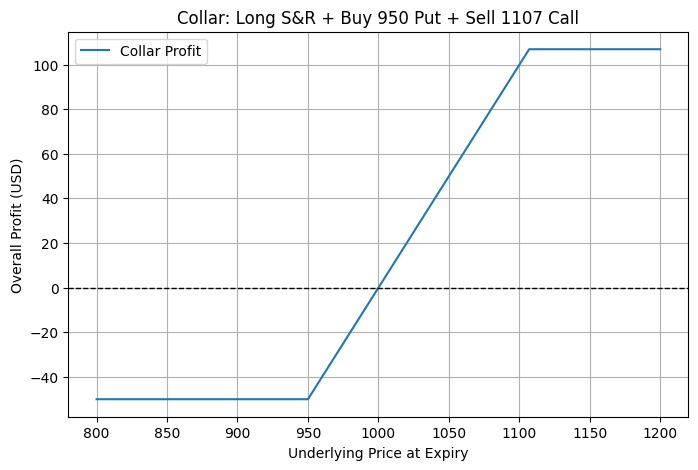

In [232]:
# ----------------------
# Plot the profit
# ----------------------
plt.figure(figsize=(8,5))
plt.plot(S_vals, profits, label='Collar Profit')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Collar: Long S&R + Buy 950 Put + Sell 1107 Call')
plt.xlabel('Underlying Price at Expiry')
plt.ylabel('Overall Profit (USD)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [233]:
# ----------------------
# How close is it to zero-cost?
# ----------------------
if abs(net_premium) < 0.50:
    print(f"This collar is very close to zero-cost, with a net premium of {net_premium:.3f} USD.")
else:
    print(f"This collar is not quite zero-cost; the net premium is {net_premium:.3f} USD.")

This collar is very close to zero-cost, with a net premium of -0.096 USD.


## 3.13
Draw profit diagrams for the following positions
* 1050-strike S&R straddle.
* Written 950-strike S&R straddle.
* Simultaneous purhcase of a 1050-strike straddle and sale of a 950-strike S&R straddle

In [234]:
# -------------------------
# Option premium data
# -------------------------
call_950  = 120.405
put_950   = 51.777
call_1050 = 71.802
put_1050  = 101.214

In [236]:
# Straddle costs (buy one call + buy one put)
cost_straddle_950 = call_950 + put_950 # 172.182
cost_straddle_1050 = call_1050 + put_1050 # 173.016

In [237]:
# -------------------------
# 1) Long 1050‐Strike Straddle
#    Premium outlay = cost_straddle_1050
#    Payoff at expiry = max(S - 1050, 0) + max(1050 - S, 0)
#    Profit = payoff - cost
# -------------------------

def payoff_long_straddle(K, S):
    return np.maximum(S - K, 0) + np.maximum(K - S, 0)

In [238]:
# -------------------------
# 2) Short 950‐Strike Straddle
#    Premium received = cost_straddle_950
#    Payoff at expiry = – [ max(S-950,0) + max(950-S,0) ]
#    Profit = payoff + (premium received)
# -------------------------

def payoff_short_straddle(K, S):
    # The payoff from *shorting* a straddle is simply the negative of being long:
    return -payoff_long_straddle(K, S)

In [239]:
# -------------------------
# 3) Combination:
#    BUY the 1050 straddle and SELL the 950 straddle
#    Net cost = cost_straddle_1050 - cost_straddle_950
#    Net payoff at expiry = payoff_long_1050 - payoff_long_950
#                         = payoff_long_straddle(1050) - payoff_long_straddle(950)
#    Net profit = net payoff - net cost
# -------------------------

In [240]:
# Underlying prices at expiry for plotting
S = np.linspace(800, 1200, 401)

In [241]:
# (a) Long 1050‐straddle profit
payoff_a = payoff_long_straddle(1050, S)
profit_a = payoff_a - cost_straddle_1050

In [242]:
# (b) Short 950‐straddle profit
payoff_b = payoff_short_straddle(950, S)
profit_b = payoff_b + cost_straddle_950

In [243]:
# (c) Combined: buy 1050‐straddle, sell 950‐straddle
net_payoff_c = payoff_a - payoff_long_straddle(950, S)
net_cost_c   = cost_straddle_1050 - cost_straddle_950
profit_c     = net_payoff_c - net_cost_c

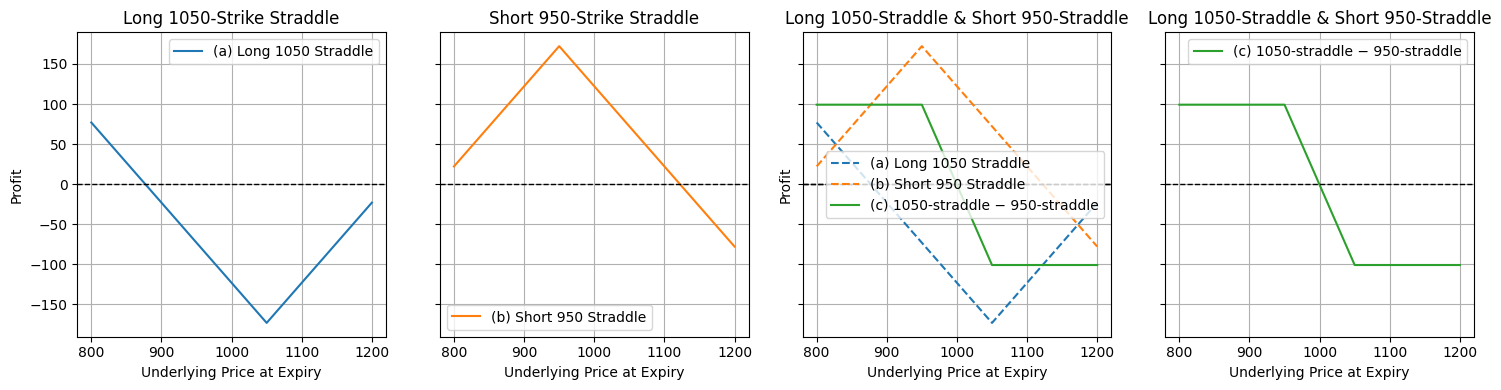

In [270]:
# -------------------------
# Plot all three in subplots
# -------------------------
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

# ---- (a) Long 1050‐straddle
axes[0].plot(S, profit_a, label='(a) Long 1050 Straddle')
axes[0].axhline(0, color='k', ls='--', lw=1)
axes[0].set_title('Long 1050‐Strike Straddle')
axes[0].set_xlabel('Underlying Price at Expiry')
axes[0].set_ylabel('Profit')
axes[0].grid(True)
axes[0].legend(loc='best')

# ---- (b) Written 950‐straddle
axes[1].plot(S, profit_b, label='(b) Short 950 Straddle', color='C1')
axes[1].axhline(0, color='k', ls='--', lw=1)
axes[1].set_title('Short 950‐Strike Straddle')
axes[1].set_xlabel('Underlying Price at Expiry')
axes[1].grid(True)
axes[1].legend(loc='best')

# ---- (c) Combination 1050‐straddle
axes[2].plot(S, profit_a, label='(a) Long 1050 Straddle', ls="--")
axes[2].plot(S, profit_b, label='(b) Short 950 Straddle', color='C1', ls="--")
axes[2].axhline(0, color='k', ls='--', lw=1)
axes[2].set_title('Long 1050‐Strike Straddle and Short 950-strike Straddle')
axes[2].set_xlabel('Underlying Price at Expiry')
axes[2].set_ylabel('Profit')
axes[2].grid(True)
axes[2].legend(loc='best')

# ---- (c) Buy 1050‐straddle + Sell 950‐straddle
axes[2].plot(S, profit_c, label='(c) 1050‐straddle − 950‐straddle', color='C2')
axes[2].axhline(0, color='k', ls='--', lw=1)
axes[2].set_title('Long 1050‐Straddle & Short 950‐Straddle')
axes[2].set_xlabel('Underlying Price at Expiry')
axes[2].grid(True)
axes[2].legend()

# ---- (c) Buy 1050‐straddle + Sell 950‐straddle
axes[3].plot(S, profit_c, label='(c) 1050‐straddle − 950‐straddle', color='C2')
axes[3].axhline(0, color='k', ls='--', lw=1)
axes[3].set_title('Long 1050‐Straddle & Short 950‐Straddle')
axes[3].set_xlabel('Underlying Price at Expiry')
axes[3].grid(True)
axes[3].legend(loc='best')

plt.tight_layout()
plt.show()

## 3.14
Suppose you buy a 950-strike S&R cvall, sell a 1000-strike S&R call, sell a 950-strike S&R put, and buy a 1000-strike S&R put.

* Verify that there is no S&R price risk in this transaction.
* What is the initial cost of the position?
* What is the value of the position after 6 months?
* Verify that the implicit interest rate in these cash flows is 2% over 6 months.

In [271]:
# -------------------------
# Given 6-month option premiums
# -------------------------
call_950   = 120.405   # cost to BUY a 950 call
call_1000  = 93.809    # cost to BUY a 1000 call
put_950    = 51.777    # cost to BUY a 950 put
put_1000   = 74.201    # cost to BUY a 1000 put

In [272]:
# But we are:
#  1) BUY  950-strike call   =>  -120.405   (pay out)
#  2) SELL 1000-strike call  =>  +93.809
#  3) SELL 950-strike put    =>  +51.777
#  4) BUY  1000-strike put   =>  -74.201

In [273]:
# -------------------------
# 1. Compute the net cost at time 0
# -------------------------
net_cost = -call_950 + call_1000 + put_950 - put_1000
print(f"Initial cost of the position = {net_cost:.3f} USD")

Initial cost of the position = -49.020 USD


In [275]:
# (Note that a negative sign here means WE pay out that amount initially.)

In [277]:
# -------------------------
# 2. Show that the payoff at expiry is always 50
# -------------------------

def payoff(S):
    # (1) long 950-call
    c950 = max(S - 950,0)
    # (2) short 1000-call
    c1000 = -max(S - 1000, 0)
    # (3) short 950-put
    p950 = -max(950 - S, 0)
    # (4) long 1000-put
    p1000 = max(1000 - S, 0)
    return c950 + c1000 + p950 + p1000

In [278]:
S_values = [900, 950, 999, 1000, 1100]
payoffs = [payoff(S) for S in S_values]
print("Payoffs at expiry for sample S-values:")
for S_, pf in zip(S_values, payoffs):
    print(f"  S={S_:4d}, payoff = {pf}")

Payoffs at expiry for sample S-values:
  S= 900, payoff = 50
  S= 950, payoff = 50
  S= 999, payoff = 50
  S=1000, payoff = 50
  S=1100, payoff = 50


In [279]:
# Check that they are all the same
unique_payoffs = set(payoffs)
print(f"All payoff values = {unique_payoffs} => constant payoff of ${list(unique_payoffs)[0]:.2f}")

All payoff values = {50} => constant payoff of $50.00


In [280]:
# -------------------------
# 3. Value in 6 months is 50
# -------------------------
print("Therefore, the value of this position at maturity is exactly $50, regardless of S.")

Therefore, the value of this position at maturity is exactly $50, regardless of S.


In [281]:
# -------------------------
# 4. Verify the 2% interest rate over 6 months
# If the position costs about 49 now and is worth 50 in 6 months,
# that is effectively a 2% half-year yield.
# -------------------------

In [282]:
future_value = 50.0
present_value = -net_cost  # net_cost is negative if we pay out
implied_rate_6m = future_value / present_value - 1
print(f"Present value = {present_value:.2f}, future value = 50, implied 6m rate = {implied_rate_6m*100:.2f}%")

Present value = 49.02, future value = 50, implied 6m rate = 2.00%


## 3.17
Construct an asymmetric butterfly using the 950-, 1020-, and 1050-strike options. How many of each option do you hold? Draw a profit diagram for the position.

In [283]:
# Given strikes
K1, K2, K3 = 950, 1020, 1050

# Given call prices for 6-month options:
c1, c2, c3 = 120.405, 84.470, 71.802  # premiums at strikes 950, 1020, 1050

# Position sizes in each option:
n1, n2, n3 = 1, -2, 1  # +1 call at 950, -2 calls at 1020, +1 call at 1050

# Calculate net premium cost of opening the position
net_cost = n1*c1 + n2*c2 + n3*c3

# Set up a range of possible underlying prices at expiration
S = np.linspace(800, 1200, 401)

In [284]:
# Calculate the terminal payoff from the calls (ignoring premium)
payoff = (n1*np.maximum(S - K1, 0) +
          n2*np.maximum(S - K2, 0) +
          n3*np.maximum(S - K3, 0))

# Profit (payoff minus the initial cost)
profit = payoff - net_cost

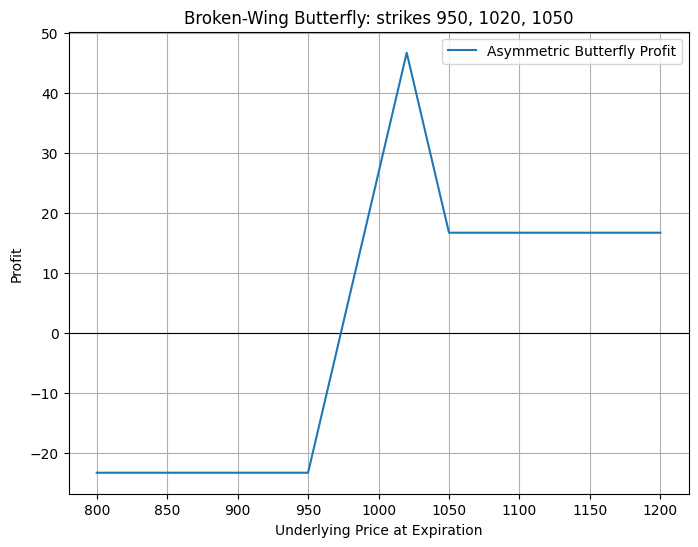

Net premium cost of the position = 23.267 USD


In [285]:
# Plot the profit diagram
plt.figure(figsize=(8,6))
plt.axhline(0, color='black', linewidth=0.8)
plt.plot(S, profit, label='Asymmetric Butterfly Profit')
plt.xlabel('Underlying Price at Expiration')
plt.ylabel('Profit')
plt.title('Broken-Wing Butterfly: strikes 950, 1020, 1050')
plt.legend()
plt.grid(True)
plt.show()

# Print the net cost
print(f"Net premium cost of the position = {net_cost:.3f} USD")

## 3.19
Here is a quote from an investment website about an investment strategy using options:

* One strategy investors are applying to the XYZ options is using "synthetic stock". A synthetic stock is created when an investor simultaneously purchases a call option and sells a put option the same stock. The end result is that the synthetic stock has the same value, in terms of capital gain potential, as the underlying stock itself. Provided the premiums on the options are the same, they cancel each other out so the transaction fees are a wash.

Suppose, to be concrete, that premium on the call you buy is the same as the premium on the put you sell, and both haev the same strikes and times to expiration.

* What can you say about the strike price?
* What term best describes the position you have created?
* Suppose the options have a bid-ask spread. If you are creating a synthetic
purchased stock and the net premium is zero inclusive of the bid-ask spread,
where will the strike price be relative to the forward price?
* If you create a synthetic short stock with zero premium inclusive of the bid-ask
spread, where will the strike price be relative to the forward price?
* Do you consider the “transaction fees” to really be “a wash”? Why or why
not?

In [287]:
# ---------------
# 1. PARAMETERS
# ---------------
K = 100.0      # Strike (chosen to be "at forward" in an idealized world)
call_prem = 5  # Example call premium
put_prem  = 5  # Example put premium (same as call to illustrate the "zero-cost" idea)

In [288]:
# Range of possible stock prices at expiration
S = np.linspace(0, 200, 201)

In [289]:
# ----------------------------
# 2. PAYOFF CALCULATIONS
# ----------------------------
# Long call payoff = max(S - K, 0)
long_call = np.maximum(S - K, 0)

# Short put payoff = - max(K - S, 0)
short_put = -np.maximum(K - S, 0)

# Combined payoff at expiration
synthetic_long = long_call + short_put

In [290]:
# Net profit: payoff minus premiums paid (call) plus premium received (put).
# Here we assume the net premium is zero if call_prem == put_prem.
# If you want to see the effect of the actual cost, just set:
#    net_premium = call_prem - put_prem
net_premium = (call_prem - put_prem)
profit = synthetic_long - net_premium

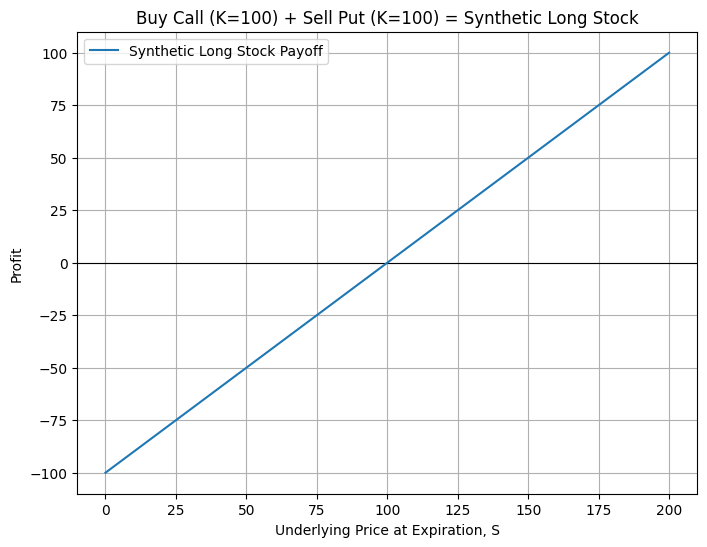

Net premium (Call - Put) = 0.00.
If Call premium = Put premium, net premium = 0, so payoff is S - K at all S.


In [291]:
# ---------------
# 3. PLOTTING
# ---------------
plt.figure(figsize=(8,6))
plt.axhline(0, color='black', linewidth=0.8)
plt.plot(S, profit, label='Synthetic Long Stock Payoff')
plt.xlabel('Underlying Price at Expiration, S')
plt.ylabel('Profit')
plt.title('Buy Call (K=100) + Sell Put (K=100) = Synthetic Long Stock')
plt.legend()
plt.grid(True)
plt.show()

print(f"Net premium (Call - Put) = {net_premium:.2f}.")
print("If Call premium = Put premium, net premium = 0, so payoff is S - K at all S.")